In [1]:
import os
os.chdir('C:/Users/raj3599/Desktop/letsuprade/Day27')

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [10]:

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# K-Nearest Neighbour

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [12]:
x = df.drop(['Pclass'],axis=1)

In [13]:
y = df['Pclass']

In [14]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=1)

In [15]:
def bestknn(n, x,y):
    
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=1)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 7
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8539325842696629
Confusion matrix when k is 1  
 [[ 64   6   1]
 [  8  35  10]
 [  0  14 129]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8164794007490637
Confusion matrix when k is 2  
 [[ 66   4   1]
 [ 13  34   6]
 [  2  23 118]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.8389513108614233
Confusion matrix when k is 3  
 [[ 64   5   2]
 [  9  32  12]
 [  2  13 128]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.8202247191011236
Confusion matrix when k is 4  
 [[ 65   5   1]
 [ 11  34   8]
 [  2  21 120]]
--------------------------------------------

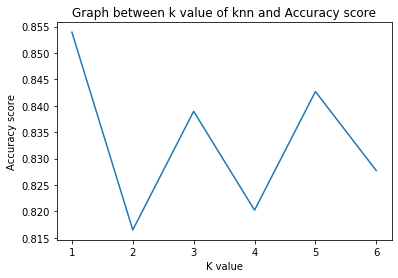

In [16]:
num = int(input('Enter The number of iteration you want for k: '))
bestknn(num,x,y)
